- **Contexto y objetivos**: 
-   Tienes una base de datos con las entregas a domicilio de una empresa de comida rapida, contiene 200 registros que corresponden a 4 dias de trabajo ( ).
-   Tu tarea es encontrar las rutas mas eficientes para entrega o mejorar la eficiencia en las entregas.


- **Preprocesamiento de datos**:
-   Paso 1. Estudiar la información contenida en los archivos
-   Paso 2. Preparar los datos
-   Paso 3. Convertir los datos en los tipos necesarios.
-   Paso 4. Encontrar y eliminar errores en los datos. Explicar errores encontrados y por que los eliminaste o dejaste

- **Análisis exploratorio**: entender los datos con los que trabajare, revisar datos atípicos para descartar y no provoquen métricas erróneas durante el analisis

- **Que buscaras en este proyecto**:
-   identificar a que zonas envian pedidos cada sucursal
-   Cual es el tiempo promedio de entrega de los pedidos
-   Cual es el mejor medio o vehiculo para realizar las entregas
-   Identificar las posibilidades de mejora en los tiempos de entregar
-   Utiliza gráficos para hacer mas entendible los resultados
-   Saca conclusiones basadas en cada gráfico y explica los resultados

- **Conclusiones y recomendaciones**: 
•   Describir conclusiónes sobre los resultados obtenidos y redactar las observaciones sobre como se puede mejorar la eficiencia en las zonas de entrega

## Inicializacion

In [82]:
import pandas as pd
import numpy as np
route_efficiency = pd.read_csv(r"C:\Users\PC\Documents\GitHub\Delivery_route_efficiency\Food_Delivery_Route_Efficiency_Dataset.csv")
print(route_efficiency)
route_efficiency.info()

     order_id  distance_km  delivery_time_min traffic_level  route_length_km  \
0           1         7.97               63.8          High             9.75   
1           2         0.90                7.6          High             1.28   
2           3        11.12               78.0        Medium            16.65   
3           4         4.90               24.8           Low             5.25   
4           5        10.04               56.0          High            11.34   
..        ...          ...                ...           ...              ...   
195       196         9.02               38.4           Low             9.57   
196       197         6.73               59.2           Low            10.04   
197       198         6.98               51.4          High             7.83   
198       199         3.80               29.2        Medium             5.34   
199       200         6.55               40.8        Medium             7.72   

    delivery_mode weather        order_

El data set se encuentra limpio, sin detalles a corregir, no hay valores nulos, creare dos columnas nuevas una para la fecha y otra para la hora con el finde poder realizar agrupamientos por fecha de ser necesario o por hora procederemos a hacer analisis sobre lo encontrado.

In [83]:
route_efficiency.duplicated().sum()

np.int64(0)

No se encontraron valores duplicados

In [84]:
print(route_efficiency['delivery_mode'].unique())
print()
print(route_efficiency['weather'].unique())
print()
print(route_efficiency['restaurant_zone'].unique())
print()
print(route_efficiency['customer_zone'].unique())


['Bicycle' 'Car' 'Bike' 'Scooter']

['Clear' 'Cloudy' 'Rainy' 'Windy']

['South' 'West' 'Central' 'North' 'East']

['North' 'Central' 'West' 'South' 'East']


In [85]:
route_efficiency['order_time'] = pd.to_datetime(route_efficiency['order_time'], errors='coerce')
route_efficiency['date'] = route_efficiency['order_time'].dt.date
route_efficiency['time'] = route_efficiency['order_time'].dt.time

In [86]:
route_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           200 non-null    int64         
 1   distance_km        200 non-null    float64       
 2   delivery_time_min  200 non-null    float64       
 3   traffic_level      200 non-null    object        
 4   route_length_km    200 non-null    float64       
 5   delivery_mode      200 non-null    object        
 6   weather            200 non-null    object        
 7   order_time         200 non-null    datetime64[ns]
 8   restaurant_zone    200 non-null    object        
 9   customer_zone      200 non-null    object        
 10  date               200 non-null    object        
 11  time               200 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 18.9+ KB


-   Paso 1. Identificar a cuantos y que zonas envian pedidos cada sucursal
-   Utiliza gráficos para hacer mas entendible los resultados
-   Saca conclusiones basadas en cada gráfico y explica los resultados

In [87]:
columns = ['restaurant_zone', 'customer_zone']
df_orders_rest = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_rest = df_orders_rest.rename(columns={'count': 'orders_count'})
print(df_orders_rest.head(25))

   restaurant_zone customer_zone  orders_count
0          Central       Central             7
1          Central          East            10
2          Central         North             9
3          Central         South            11
4          Central          West            10
5             East       Central             5
6             East          East             8
7             East         North             7
8             East         South             4
9             East          West             4
10           North       Central             8
11           North          East             6
12           North         North             6
13           North         South             3
14           North          West             7
15           South       Central            10
16           South          East            12
17           South         North            11
18           South         South            11
19           South          West            10
20           

<Axes: xlabel='restaurant_zone', ylabel='orders_count'>

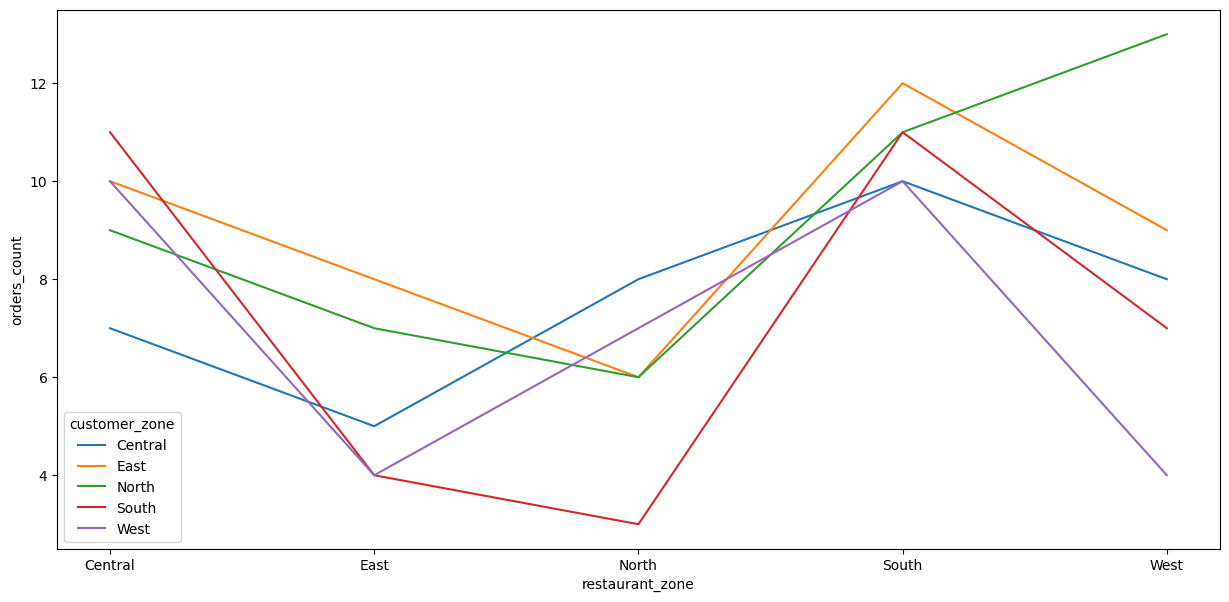

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.lineplot(data = df_orders_rest, x = 'restaurant_zone', y = 'orders_count', hue = 'customer_zone')

Es visible que todos los restaurabtes atienden todas las zonas sin importar su ubicacion, esto lleva a que los tiempos de traslado puedan ser mas largos de lo esperado por atender zonas mas lejanas. El restaurant de la zona central, podria atender a todas las zonas por tener la facilidad de encontarse al centro de la ciudad, en cambio el restaurant de la zona norte tiene tiene apenas 6 pedidos en su zona, mientras en la sur, que seria hasta el otro extremo de la ciudad 11 pedidos y 13 a la zona oeste.

-   Paso 2. Cual es el tiempo promedio de entrega de los pedidos

In [89]:
columns = ['restaurant_zone', 'customer_zone']
df_time_prom = route_efficiency.groupby(columns)['delivery_time_min'].mean().reset_index()
df_time_prom = df_time_prom.rename(columns={'delivery_time_min': 'delivery_time_average'})
print(df_time_prom.head(25))

   restaurant_zone customer_zone  delivery_time_average
0          Central       Central              43.185714
1          Central          East              49.950000
2          Central         North              32.022222
3          Central         South              46.927273
4          Central          West              45.490000
5             East       Central              44.800000
6             East          East              52.400000
7             East         North              50.142857
8             East         South              60.625000
9             East          West              46.525000
10           North       Central              54.575000
11           North          East              50.216667
12           North         North              42.033333
13           North         South              66.866667
14           North          West              22.571429
15           South       Central              44.190000
16           South          East              35

<Axes: xlabel='restaurant_zone', ylabel='delivery_time_average'>

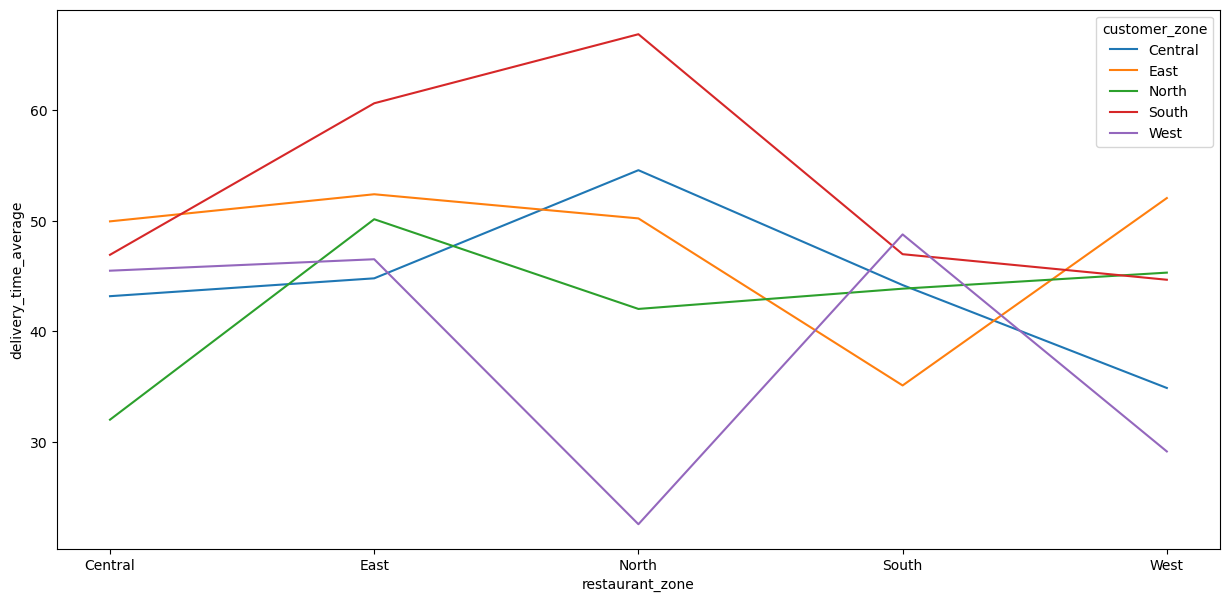

In [90]:
plt.figure(figsize=(15,7))
sns.lineplot(data = df_time_prom, x = 'restaurant_zone', y = 'delivery_time_average', hue = 'customer_zone')

Son notables los tiempos de entrega a cada zona por parte de cada restaurant, incluso se nota que el restaurant de la zona oeste tiene mejores tiempo de entrega de manera general comparado con todos los demas restaurantes, incluso para llevar un pedido hasta la zona mas lejana que seria el este, donde tarda en llegar 45 minutos promedio

-   Paso 3. Cual es el mejor medio o vehiculo para realizar las entregas mas rapido.

In [91]:
df_delivery_mode_central = route_efficiency[route_efficiency['restaurant_zone'] == 'Central']
columns = ['customer_zone','delivery_mode']
df_delivery_mode_central = df_delivery_mode_central.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode_central = df_delivery_mode_central.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode_central.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle            1              68.900000
1        Central          Bike            1              40.800000
2        Central           Car            2              41.500000
3        Central       Scooter            3              36.533333
4           East       Bicycle            4              49.875000
5           East          Bike            1              42.900000
6           East           Car            3              35.000000
7           East       Scooter            2              76.050000
8          North       Bicycle            1              43.200000
9          North          Bike            4              33.375000
10         North           Car            1              57.900000
11         North       Scooter            3              17.866667
12         South          Bike            3              42.666667
13         South           Car            4              63.62

-   Paso 4. Identificar las posibilidades de mejora en los tiempos de entregar

<Axes: title={'center': 'Central zone restaurant'}, xlabel='customer_zone', ylabel='order_count'>

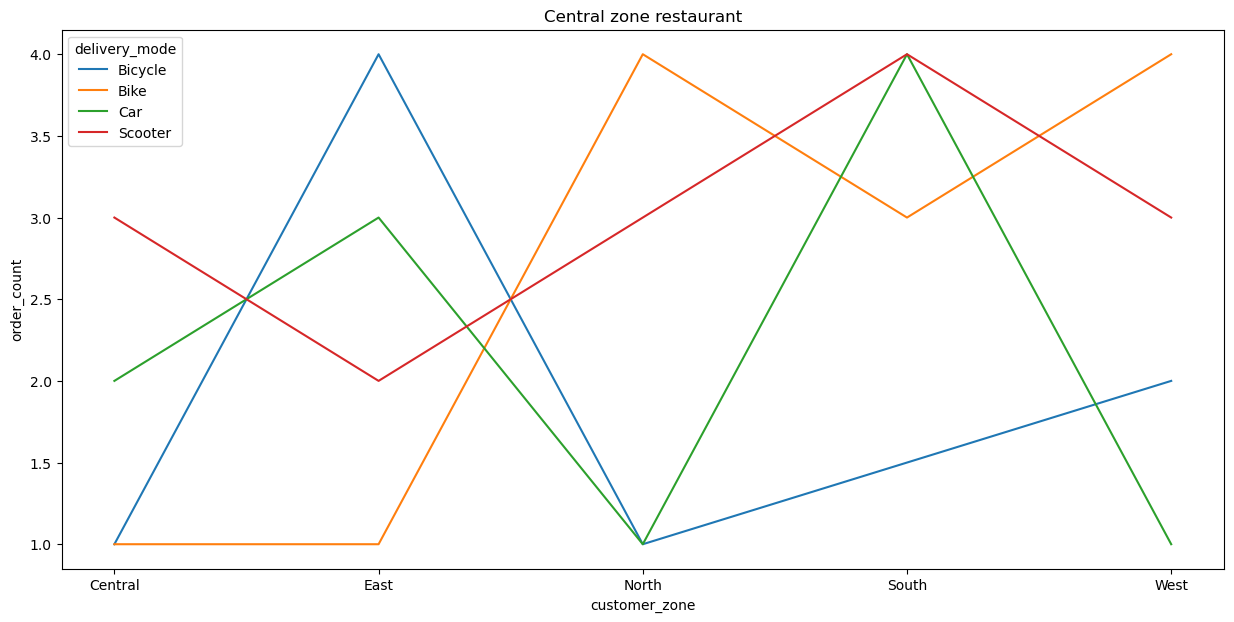

In [92]:
plt.figure(figsize=(15,7))
plt.title("Central zone restaurant")
sns.lineplot(data = df_delivery_mode_central, x = 'customer_zone', y = 'order_count', hue = 'delivery_mode')

In [93]:
df_delivery_mode_north = route_efficiency[route_efficiency['restaurant_zone'] == 'North']
columns = ['customer_zone','delivery_mode']
df_delivery_mode_north = df_delivery_mode_north.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode_north = df_delivery_mode_north.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode_north.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle            2              57.300000
1        Central          Bike            3              64.300000
2        Central           Car            2              36.700000
3        Central       Scooter            1              55.700000
4           East       Bicycle            2              44.350000
5           East          Bike            1              25.800000
6           East           Car            1              67.200000
7           East       Scooter            2              59.800000
8          North       Bicycle            2              56.150000
9          North          Bike            1              21.300000
10         North       Scooter            3              39.533333
11         South       Bicycle            2              70.200000
12         South           Car            1              60.200000
13          West       Bicycle            1               9.80

<Axes: title={'center': 'North zone restaurant'}, xlabel='customer_zone', ylabel='order_count'>

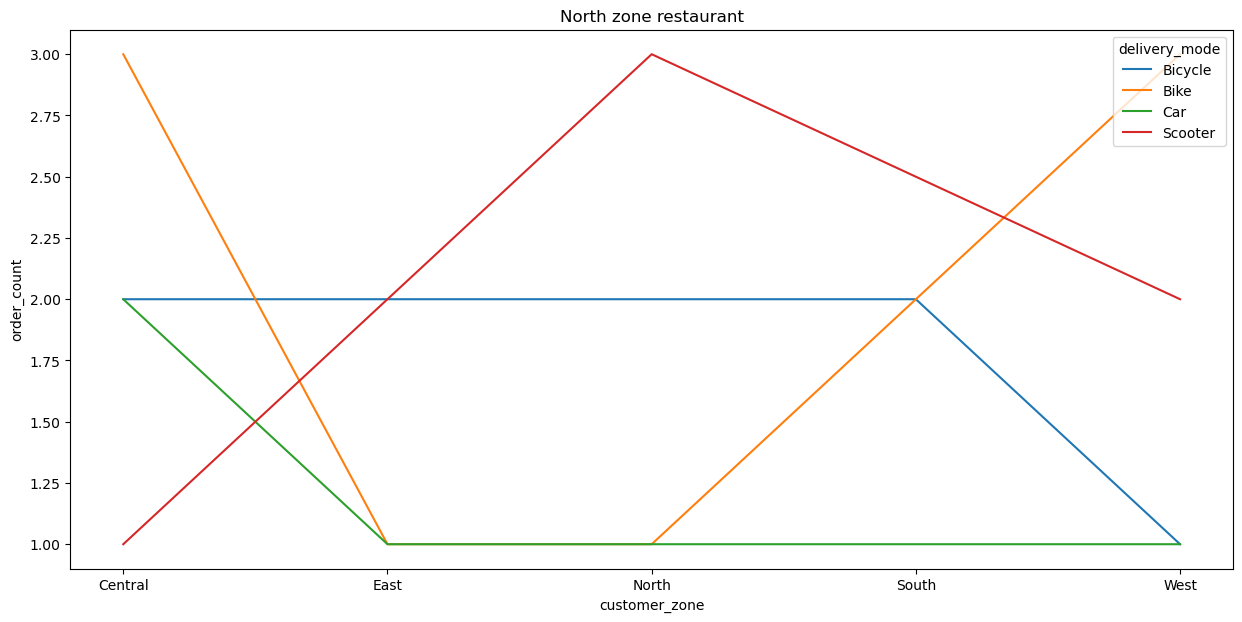

In [94]:
plt.figure(figsize=(15,7))
plt.title("North zone restaurant")
sns.lineplot(data = df_delivery_mode_north, x = 'customer_zone', y = 'order_count', hue = 'delivery_mode')

In [95]:
df_delivery_mode_south = route_efficiency[route_efficiency['restaurant_zone'] == 'South']
columns = ['customer_zone','delivery_mode']
df_delivery_mode_south = df_delivery_mode_south.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode_south = df_delivery_mode_south.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode_south.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle            6              44.633333
1        Central          Bike            3              56.300000
2        Central       Scooter            1               5.200000
3           East       Bicycle            2              40.800000
4           East          Bike            3              42.300000
5           East           Car            3              21.766667
6           East       Scooter            4              36.900000
7          North       Bicycle            4              33.275000
8          North          Bike            1              73.500000
9          North           Car            5              41.340000
10         North       Scooter            1              69.200000
11         South       Bicycle            3              29.766667
12         South          Bike            4              42.575000
13         South           Car            1              90.60

<Axes: title={'center': 'South zone restaurant'}, xlabel='customer_zone', ylabel='order_count'>

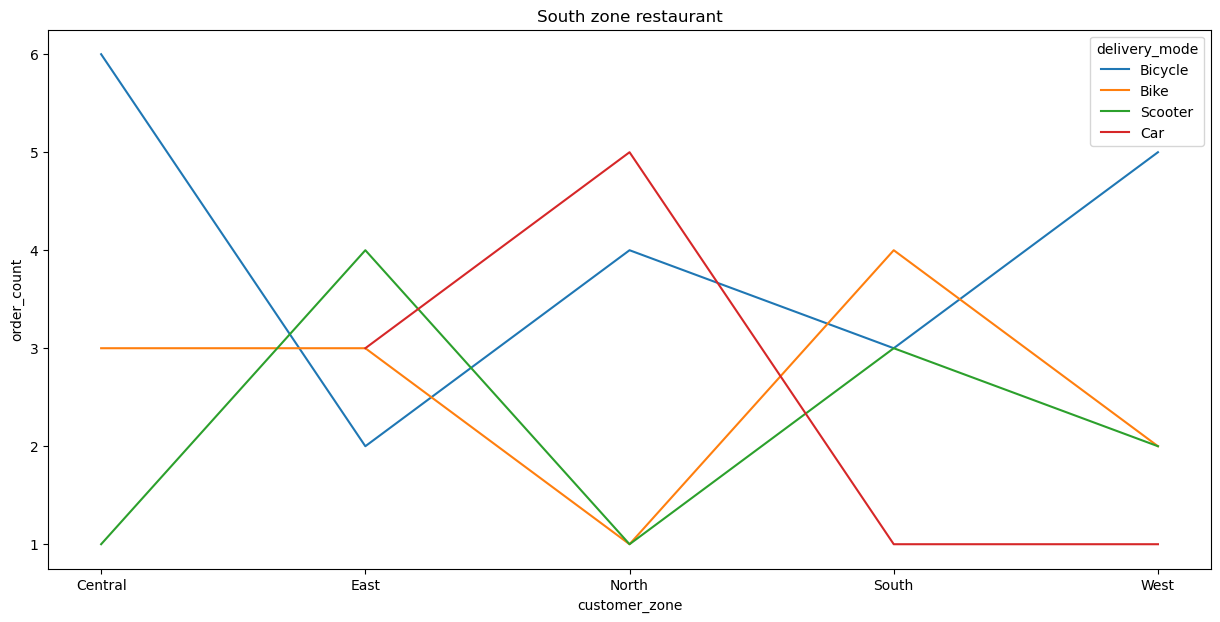

In [96]:
plt.figure(figsize=(15,7))
plt.title("South zone restaurant")
sns.lineplot(data = df_delivery_mode_south, x = 'customer_zone', y = 'order_count', hue = 'delivery_mode')

In [97]:
df_delivery_mode_west = route_efficiency[route_efficiency['restaurant_zone'] == 'West']
columns = ['customer_zone','delivery_mode']
df_delivery_mode_west = df_delivery_mode_west.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode_west = df_delivery_mode_west.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode_west.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle            1              37.600000
1        Central          Bike            3              25.533333
2        Central           Car            2              35.100000
3        Central       Scooter            2              47.350000
4           East       Bicycle            3              51.466667
5           East          Bike            2              35.700000
6           East           Car            3              61.833333
7           East       Scooter            1              57.200000
8          North       Bicycle            2              28.200000
9          North          Bike            2              28.050000
10         North           Car            5              49.400000
11         North       Scooter            4              57.400000
12         South       Bicycle            1              58.200000
13         South          Bike            2              58.70

<Axes: title={'center': 'West zone restaurant'}, xlabel='customer_zone', ylabel='order_count'>

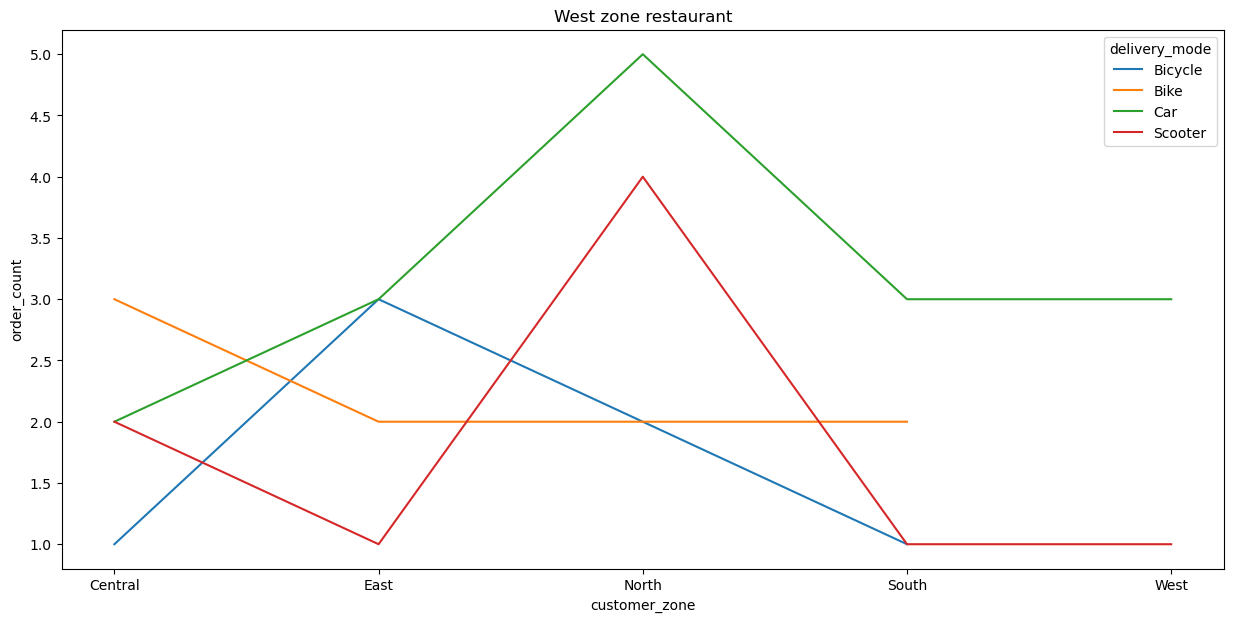

In [98]:
plt.figure(figsize=(15,7))
plt.title("West zone restaurant")
sns.lineplot(data = df_delivery_mode_west, x = 'customer_zone', y = 'order_count', hue = 'delivery_mode')

In [99]:
df_delivery_mode_east = route_efficiency[route_efficiency['restaurant_zone'] == 'East']
columns = ['customer_zone','delivery_mode']
df_delivery_mode_east = df_delivery_mode_east.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode_east = df_delivery_mode_east.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode_east.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle            3              57.266667
1        Central          Bike            1              27.200000
2        Central           Car            1              25.000000
3           East       Bicycle            2              89.600000
4           East          Bike            2              49.100000
5           East           Car            1               7.900000
6           East       Scooter            3              44.633333
7          North       Bicycle            1              32.100000
8          North          Bike            2              52.200000
9          North           Car            2              43.550000
10         North       Scooter            2              63.700000
11         South          Bike            1              50.400000
12         South           Car            1              44.000000
13         South       Scooter            2              74.05

<Axes: title={'center': 'East zone restaurant'}, xlabel='customer_zone', ylabel='order_count'>

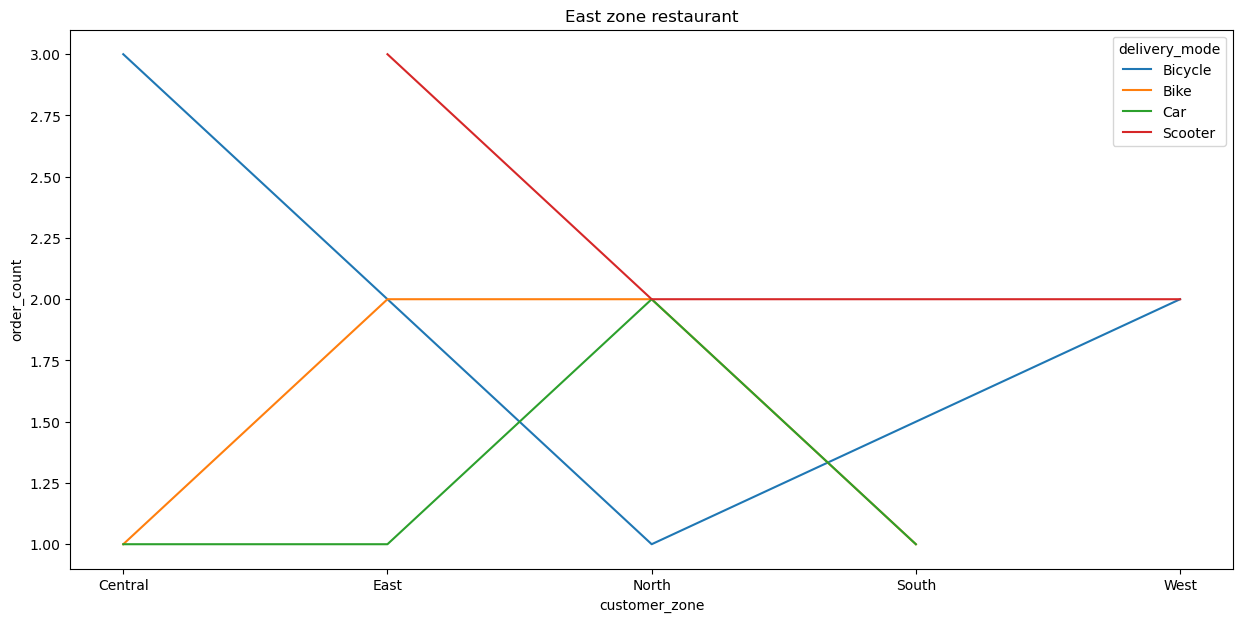

In [100]:
plt.figure(figsize=(15,7))
plt.title("East zone restaurant")
sns.lineplot(data = df_delivery_mode_east, x = 'customer_zone', y = 'order_count', hue = 'delivery_mode')

In [ ]:
columns = ['restaurant_zone']
df_orders_restaurant = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_restaurant = df_orders_restaurant.rename(columns={'count': 'orders_count'})
print(df_orders_restaurant.head(25))

  restaurant_zone  orders_count
0         Central            47
1            East            28
2           North            30
3           South            54
4            West            41


In [ ]:
columns = ['customer_zone']
df_orders_zone = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_zone = df_orders_zone.rename(columns={'count': 'orders_count'})
print(df_orders_zone.head(25))

  customer_zone  orders_count
0       Central            38
1          East            45
2         North            46
3         South            36
4          West            35


## Conclusiones y sugerencias

-   Se sugiere corregir las zonas de influencia de cada restaurant para mejorar los tiempos de entrega, si comparamos los pedidos que atiende cada sucursal vs los pedidos que se generan por zona, facilmente pueden atender sus zonas sin tener que atender a las zonas mas lejanas.
-   La zona Central es la que puede tener un area de influencia mas grande.
-   Si un restaurant se carga de pedidos en su zona y no puede atenderlos puede derivarlos al restaurant mas cercano en zonas triangulares.
-       Ejemplo, si hablamos de pedidos rebasados en la zona norte, pueden atender, en orden de ubicacion, los que queden mas cercanos a las zonas mas cercanas, que serian la central, la este y la oeste, quedaria completamente descargado el restaurant de la zona sur para para atender pedidos de la zona norte

-   Hecho esto se puede mejorar tambien la forma de uso de los 4 medios que se usan para la entrega, menor cantidad y mas cercano, usar bicicleta o motoneta. Si son pedidos con ordenes mas grandes o mas lejanos, enviar por medio de motocicleta o auto.

-   Con estos cambios se pueden maximizar los tiempos de entrega.